# 7장 군집화

## 01 K-평균 알고리즘

### K-평균을 이용한 Iris 붓꽃 데이터 군집화

In [ ]:
# 데이터 로드
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

iris = load_iris()
# DataFrame 변환
irisDF = pd.DataFrame(data=iris.data,
                      columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# K Means 군집화 수행 (3개 그룹으로)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
# target vs 군집화 결과 비교
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_

iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
# PCA 차원 축소 후 시각화 (2차원 평면 시각화를 위해 차원 축소)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


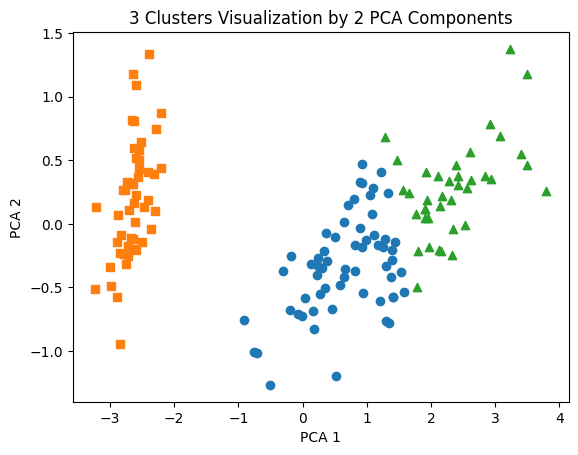

In [ ]:
# 군집값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값이 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출 / 마커로 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline

# 1. 데이터 생성
X, y = make_blobs(
    n_samples = 200,        # 샘플 수
    n_features = 2,         # 특성 수(2 → 2D 시각화 용이)
    centers = 3,            # 군집 개수
    cluster_std = 0.8,      # 군집 내 데이터 퍼짐 정도 (표준편차)
    random_state = 0
)

# 2. 생성된 X, y의 shape
print(X.shape, y.shape)

# 3. y(target)의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2']) # dataframe 변환
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


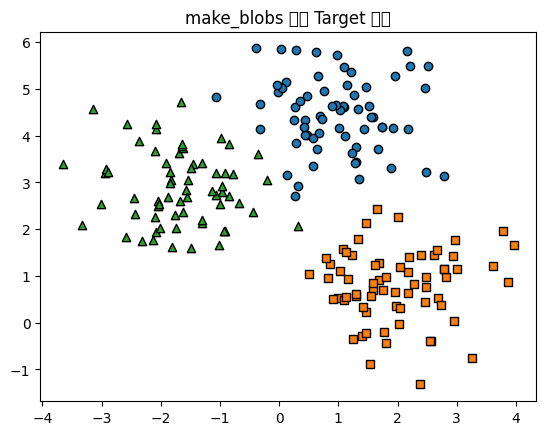

In [ ]:
target_list = np.unique(y)

# 타깃별 산점도 — marker 종류
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 4. target별 scatter plot
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_lists는 [0, 1, 2]
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(
        x=target_cluster['ftr1'],
        y=target_cluster['ftr2'],
        edgecolor='k',
        marker=markers[target]
    )
plt.title("make_blobs 원본 Target 분포")
plt.show()


In [ ]:
# 5. KMeans 클러스터링 수행
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=200,
    random_state=0
)

cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

In [ ]:
# 6. 클러스터 중심점
# 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

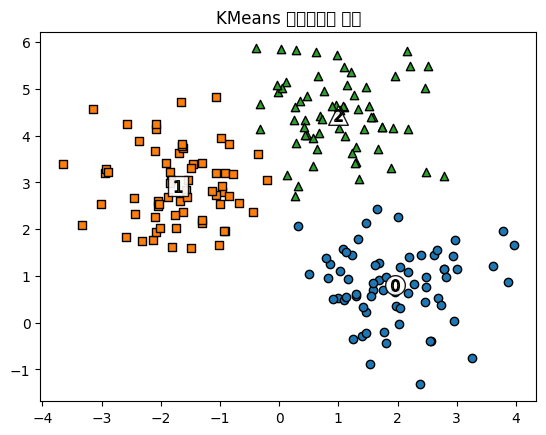

In [ ]:
# 7. KMeans 결과 시각화
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]

    # 데이터 점
    plt.scatter(
        x=label_cluster['ftr1'],
        y=label_cluster['ftr2'],
        edgecolor='k',
        marker=markers[label]
    )

    # 중심점
    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=200,
        color='white',
        alpha=0.9,
        edgecolor='k',
        marker=markers[label]
    )

    # 중심점 라벨 표시
    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=70,
        color='yellow',
        edgecolor='k',
        marker=f'${label}$'
    )

plt.title("KMeans 클러스터링 결과")
plt.show()

In [ ]:
# 8. target vs cluster 결과 비교
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


## 02 군집 평가

### 붓꽃 데이터 세트를 이용한 군집 평가

In [ ]:
## 붓꽃 데이터 세트를 이용한 군집 평가
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# 데이터 로드
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# KMeans 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# 모든 개별 데이터의 실루엣 계수 구함 (계산)
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape:', score_samples.shape)

# 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 평균 실루엣 계수 계산
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {:.3f}'.format(average_score))

# 일부 데이터 확인
display(irisDF.head(3))

# 군집별 평균 실루엣 계수
irisDF.groupby('cluster')['silhouette_coeff'].mean()

silhouette_samples() return 값의 shape: (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


### 군집별 평균 실루엣 계수의시각화를 통한 군집 개수 최적화 방법

In [ ]:
# visualize_silhouette([2,3,4,5], X_features)

In [ ]:
# # make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성

# from sklearn.datasets import make_blobs
# from sklearn.metrics import silhouette_samples, silhouette_score

# # make_blobs로 데이터 생성 (4개의 군집)
# X, y = make_blobs(n_samples=500, n_features=2, centers=4,
#                   cluster_std=1, center_box=(-10.0, 10.0),
#                   shuffle=True, random_state=1)

# # 군집 개수 2~5 시각화
# visualize_silhouette([2, 3, 4, 5], X)

In [ ]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# visualize_silhouette([2, 3, 4, 5], iris.data)

## 03 평균 이동

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5]


결과: 군집이 0~5까지 6개로 분류됨 (지나치게 세분화)
- bandwidth 값 작게 할수록 군집 개수가 많아짐

In [ ]:
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


결과: bandwidth 1.0으로 높였더니 3개의 군집으로 군집화 됨

 -> 최적화된 bandwidth 찾기

In [ ]:
from sklearn.cluster import estimate_bandwidth

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)
print('최적의 bandwidth 값: ', round(best_bandwidth, 3))

최적의 bandwidth 값:  1.816


이 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화 수행

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


결과: 3개의 군집으로 구성 -> 시각화해보기
- 평균이동도 K-평균과 유사하게 중심을 가지고 있으므로 cluster_centers_ 속성으로 군집 중심 좌표 표시 가능

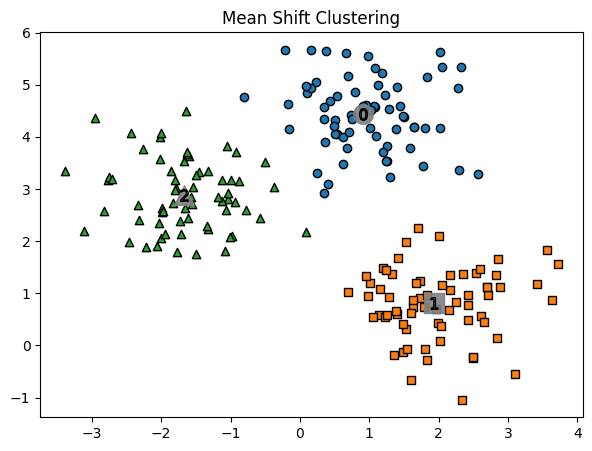

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF["meanshift_label"] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ["o", "s", "^", "x", "*"]   # 5개 마커

plt.figure(figsize=(7, 5))

for label in unique_labels:
    label_cluster = clusterDF[clusterDF["meanshift_label"] == label]
    center_x_y = centers[label]

    # 군집 산점도
    plt.scatter(
        x=label_cluster["ftr1"],
        y=label_cluster["ftr2"],
        edgecolor="k",
        marker=markers[label]
    )

    # 중심점(큰 회색)
    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=200,
        color="gray",
        alpha=0.9,
        marker=markers[label]
    )

    # 중심점(번호 표시)
    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=70,
        color="white",
        edgecolor="k",
        marker=f"${label}$"
    )

plt.title("Mean Shift Clustering")
plt.show()

# ===============================
# 타깃 vs 예측 군집 분포 보기
# ===============================
print(clusterDF.groupby("target")["meanshift_label"].value_counts())

## 04 GMM (Gaussian Mixture Model)


### GMM을 이용한 붓꽃 데이터 세트 군집화 (확률 기반)

- GMM: 확률 기반 군집화
- K-평균: 거리 기반 군집화

비교

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 데이터 로드
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels

iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


### GMM과 K-평균 비교

데이터 생성 및 시각화

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers = ["o", "s", "^", "x", "*"]
    isNoise = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        if label == -1:
            cluster_legend = "Noise"
            isNoise = True
        else:
            cluster_legend = "Cluster " + str(label)

        plt.scatter(
            x=label_cluster["ftr1"],
            y=label_cluster["ftr2"],
            s=70,
            edgecolor="k",
            marker=markers[label],
            label=cluster_legend,
        )

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(
                x=center_x_y[0],
                y=center_x_y[1],
                s=250,
                color="white",
                alpha=0.9,
                edgecolor="k",
                marker=markers[label],
            )
            plt.scatter(
                x=center_x_y[0],
                y=center_x_y[1],
                s=70,
                color="k",
                edgecolor="k",
                marker="$%d$" % label,
            )
    if isNoise:
        legend_loc = "upper center"
    else:
        legend_loc = "upper right"

    plt.legend(loc=legend_loc)
    plt.show()

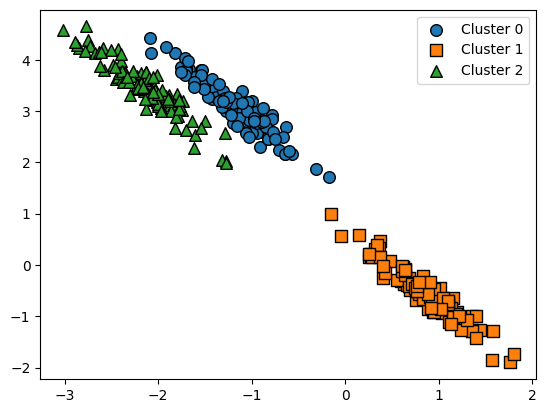

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

# make_blobs()로 300개의 데이터 생성 (3개의 군집, cluster_std=0.5)
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 타원형 데이터로 변환
transformation = np.array([[0.60834549, -0.63667341],
                           [-0.40887718,  0.85253229]])
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y결과값
# DataFrame 생성 후 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 타겟 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

Kmeans 적용

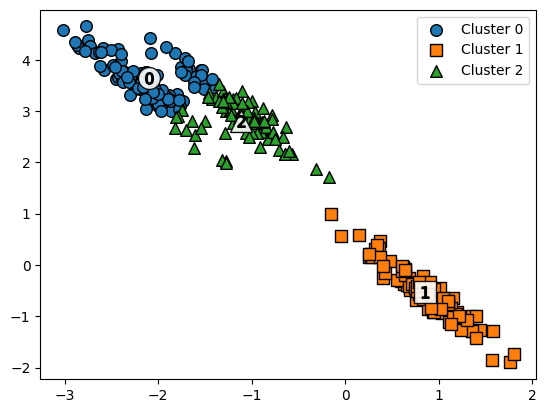

In [ ]:
from sklearn.cluster import KMeans

# 3개 군집 기반 KMeans 적용
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

clusterDF['kmeans_label'] = kmeans_label

# 군집 결과 시각화
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)


GMM 군집화

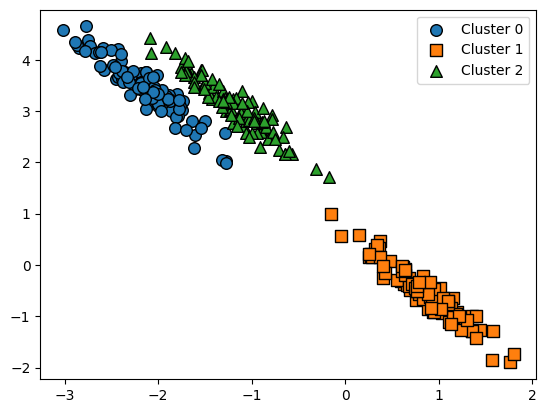

In [ ]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)

clusterDF['gmm_label'] = gmm_label

# 군집 결과 시각화 (GMM은 center 없음)
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)


KMeans vs GMM 군집 결과 비교

In [ ]:
print("### KMeans Clustering ###")
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

print("\n### Gaussian Mixture Clustering ###")
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


결과
- KMeans의 경우 군집 1번만 정확히 매핑
- 나머지 군집의 경우 어긋남
- GMM의 경우 군집이 target값과 잘 매핑되어 있음
=> GMM이 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용된다는 장점 / 수행시간 오래 걸리는 단점

## 05 DBSCAN 밀도 기반 군집화
Density Based Spatial Clustering of Applications with Noise


### 붓꽃 데이터 세트 실습

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


PCA 시각화 준비

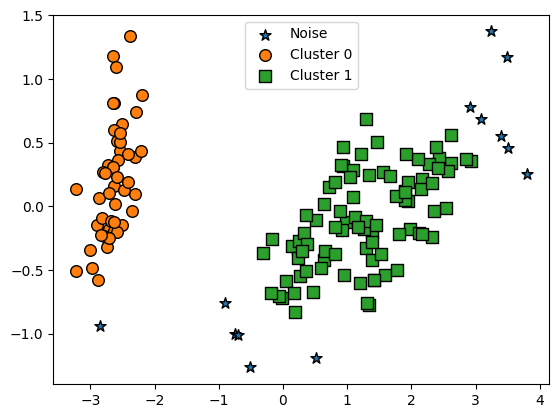

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


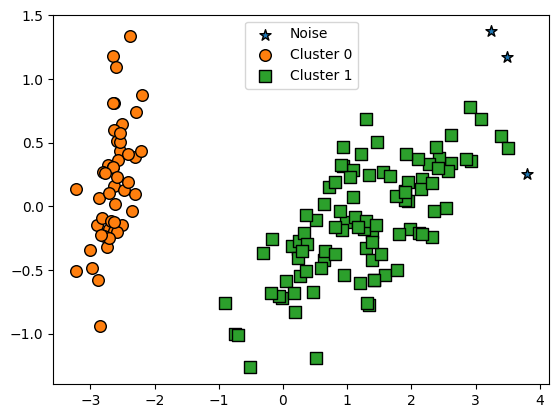

In [ ]:
# eps: 값을 크게 하면 반경이커져 포함하는 데이터가 커져 노이즈 개수가 작아진다.
# min_samples: 값을 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커진다.

from sklearn.cluster import DBSCAN

#eps를 0.8로 변경
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


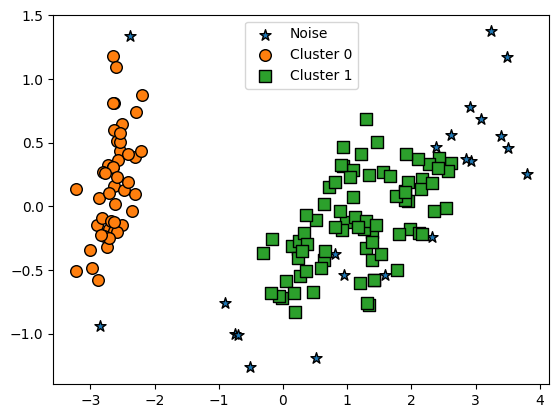

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트

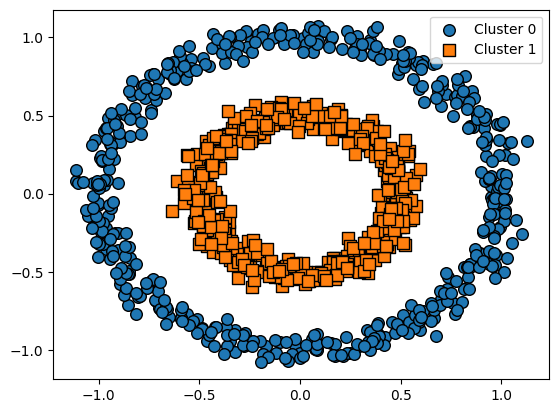

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd

X, y = make_circles(
    n_samples=1000,
    shuffle=True,
    noise=0.05,
    random_state=0,
    factor=0.5
)

clusterDF = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


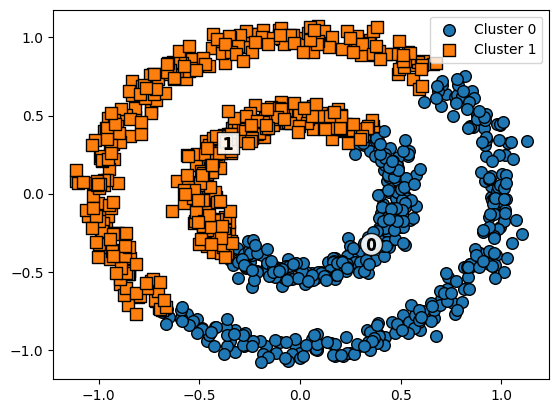

In [ ]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

clusterDF['kmeans_cluster'] = kmeans_labels
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


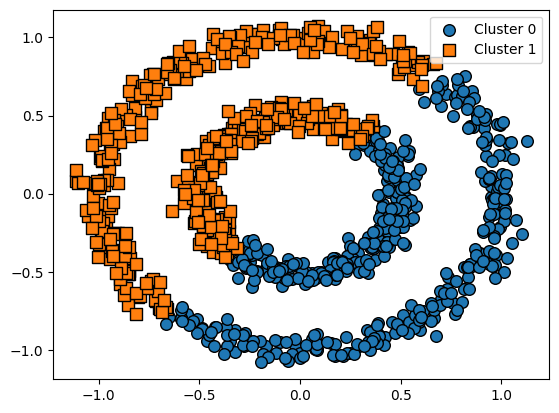

In [ ]:
# GMM 군집화
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)

clusterDF['gmm_cluster'] = gmm_label
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

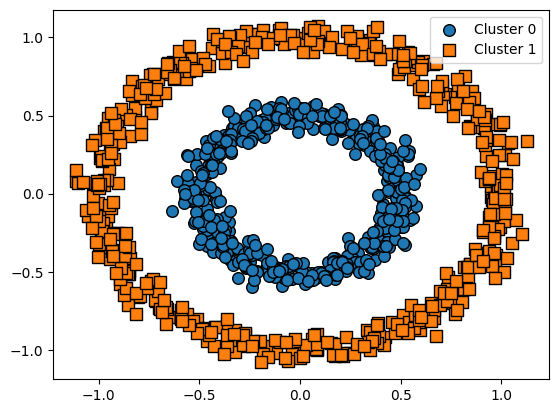

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

원하는 방향으로 정확히 군집화됨

## 06 군집화 실습 - 고객 세그먼테이션

In [ ]:
from google.colab import files
uploaded = files.upload()


In [40]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io = 'Online Retail.xlsx')

retail_df.head(3)

BadZipFile: File is not a zip file